#*DEEP LEARNING MODELLING *

#**LSTM (0.89), GRU (0.87) DURNING CENTRE PV SYSTEM FORECASTING**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
ts_data_load = pd.read_csv('Durning centre data hourly captured - with enviromental features.csv',
                           parse_dates={'dt': ['Date', 'Time']},
                           infer_datetime_format=True,
                           low_memory=False,
                           na_values=['nan', '?'],
                           index_col='dt')

# Drop the 'Precipitation' and 'Wind Speed (10 meters)' columns
ts_data_load.drop(columns=['Precipitation', 'Wind Speed (10 meters)'], inplace=True)

# Verify the changes
print(ts_data_load.head())


                     Total Yield[kWh]  Solar Irradiance  \
dt                                                        
01/01/2018 01:00:00               0.0               0.0   
01/01/2018 02:00:00               0.0               0.0   
01/01/2018 03:00:00               0.0               0.0   
01/01/2018 04:00:00               0.0               0.0   
01/01/2018 05:00:00               0.0               0.0   

                     Temprature (2 meters)  Wind Direction (10 meters)  
dt                                                                      
01/01/2018 01:00:00                   5.76                      239.93  
01/01/2018 02:00:00                   6.07                      236.78  
01/01/2018 03:00:00                   6.23                      237.25  
01/01/2018 04:00:00                   6.12                      235.04  
01/01/2018 05:00:00                   6.02                      232.90  


<ipython-input-1-de332309be1f>:5: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  ts_data_load = pd.read_csv('Durning centre data hourly captured - with enviromental features.csv',
<ipython-input-1-de332309be1f>:5: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  ts_data_load = pd.read_csv('Durning centre data hourly captured - with enviromental features.csv',


In [ ]:
ts_data_load

,Total Yield[kWh],Solar Irradiance,Temprature (2 meters),Wind Direction (10 meters)
dt,,,,
01/01/2018 01:00:00,0.0,0.0,5.76,239.93
01/01/2018 02:00:00,0.0,0.0,6.07,236.78
01/01/2018 03:00:00,0.0,0.0,6.23,237.25
01/01/2018 04:00:00,0.0,0.0,6.12,235.04
01/01/2018 05:00:00,0.0,0.0,6.02,232.90
...,...,...,...,...
31/12/2022 20:00:00,0.0,0.0,8.84,221.27
31/12/2022 21:00:00,0.0,0.0,8.92,219.68
31/12/2022 22:00:00,0.0,0.0,8.90,218.02


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the data
ts_data_load = pd.read_csv('Durning centre data hourly captured - with enviromental features.csv',
                           parse_dates={'dt': ['Date', 'Time']},
                           infer_datetime_format=True,
                           low_memory=False,
                           na_values=['nan', '?'],
                           index_col='dt')

# Remove duplicate timestamps
ts_data_load = ts_data_load[~ts_data_load.index.duplicated()]

# Define parameters
T = 6  # Number of lag variables
HORIZON = 1  # Prediction horizon
valid_st_data_load = '2022-01-11 01:00:00'
test_st_data_load = '2022-04-11 01:00:00'  # Test start date

# Step 1: Get the train data from the correct data range
train = ts_data_load.copy()[ts_data_load.index < valid_st_data_load][['Total Yield[kWh]']]

# Step 2: Scale data to be in range (0, 1) using MinMaxscaler
scaler = MinMaxScaler()
train['Total Yield[kWh]'] = scaler.fit_transform(train)

<ipython-input-3-c2ad1335e726>:5: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  ts_data_load = pd.read_csv('Durning centre data hourly captured - with enviromental features.csv',
<ipython-input-3-c2ad1335e726>:5: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  ts_data_load = pd.read_csv('Durning centre data hourly captured - with enviromental features.csv',


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the data
ts_data_load = pd.read_csv('Durning centre data hourly captured - with enviromental features.csv',
                           parse_dates={'dt': ['Date', 'Time']},
                           low_memory=False,
                           na_values=['nan', '?'],
                           index_col='dt')

# Remove duplicate timestamps
ts_data_load = ts_data_load[~ts_data_load.index.duplicated()]

# Define parameters
T = 6  # Number of lag variables
HORIZON = 1  # Prediction horizon
valid_st_data_load = pd.to_datetime('2022-01-11 01:00:00')
test_st_data_load = pd.to_datetime('2022-04-11 01:00:00')  # Test start date


<ipython-input-4-c3a5885b0247>:5: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  ts_data_load = pd.read_csv('Durning centre data hourly captured - with enviromental features.csv',


In [ ]:
# Convert index to Timestamp objects with inferred format
ts_data_load.index = pd.to_datetime(ts_data_load.index, format='mixed')

# Count the number of data points in the valid and test ranges
valid_data_points = ts_data_load[(ts_data_load.index >= valid_st_data_load) & (ts_data_load.index < test_st_data_load)].shape[0]
test_data_points = ts_data_load[ts_data_load.index >= test_st_data_load].shape[0]

print("Number of data points in the validation range:", valid_data_points)
print("Number of data points in the test range:", test_data_points)


Number of data points in the validation range: 2160
Number of data points in the test range: 6359


In [ ]:
# Get the train data from the correct data range
train = ts_data_load.copy()[ts_data_load.index < valid_st_data_load][['Total Yield[kWh]']]

# Scale data to be in range (0, 1) using MinMaxscaler
scaler = MinMaxScaler()
train['Total Yield[kWh]'] = scaler.fit_transform(train)

In [ ]:
# Step 1: Get the train data from the correct data range
train = ts_data_load.copy()[ts_data_load.index < valid_st_data_load][['Total Yield[kWh]']]

# Step 2: Scale data to be in range (0, 1) using MinMaxscaler
scaler = MinMaxScaler()
train['Total Yield[kWh]'] = scaler.fit_transform(train)


In [ ]:
# Step 3: Shift the dataframe to create the input samples using sliding window
train_shifted = train.copy()
train_shifted['y_t+1'] = train_shifted['Total Yield[kWh]'].shift(-1, freq='H')
for t in range(1, T+1):
    train_shifted[f'load_t-{T-t}'] = train_shifted['Total Yield[kWh]'].shift(T-t, freq='H')

y_col = 'y_t+1'
X_cols = [f'load_t-{T-t}' for t in range(T)]

train_shifted.columns = ['Total Yield[kWh]_original'] + [y_col] + X_cols

<ipython-input-8-3385aa3c6c5e>:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  train_shifted['y_t+1'] = train_shifted['Total Yield[kWh]'].shift(-1, freq='H')
<ipython-input-8-3385aa3c6c5e>:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  train_shifted[f'load_t-{T-t}'] = train_shifted['Total Yield[kWh]'].shift(T-t, freq='H')
<ipython-input-8-3385aa3c6c5e>:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  train_shifted[f'load_t-{T-t}'] = train_shifted['Total Yield[kWh]'].shift(T-t, freq='H')
<ipython-input-8-3385aa3c6c5e>:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  train_shifted[f'load_t-{T-t}'] = train_shifted['Total Yield[kWh]'].shift(T-t, freq='H')
<ipython-input-8-3385aa3c6c5e>:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h

In [ ]:
# Discard missing values
train_shifted = train_shifted.dropna(how='any')

# Transform pandas dataframe into a numpy array
y_train = train_shifted[y_col].to_numpy()
X_train = train_shifted[X_cols].to_numpy()

# Reshape X_train into a three-dimensional array
X_train = X_train.reshape(X_train.shape[0], T, 1)


In [ ]:
# Validation Data Preparation (similar steps as train data)
valid = ts_data_load.copy()[(ts_data_load.index >= valid_st_data_load) & (ts_data_load.index < test_st_data_load)][['Total Yield[kWh]']]
valid['Total Yield[kWh]'] = scaler.transform(valid)  # Scale using the same scaler as train
valid_shifted = valid.copy()
valid_shifted['y_t+1'] = valid_shifted['Total Yield[kWh]'].shift(-1, freq='H')
for t in range(1, T+1):
    valid_shifted[f'load_t-{T-t}'] = valid_shifted['Total Yield[kWh]'].shift(T-t, freq='H')

valid_shifted.columns = ['Total Yield[kWh]_original'] + [y_col] + X_cols
valid_shifted = valid_shifted.dropna(how='any')

y_valid = valid_shifted[y_col].to_numpy()
X_valid = valid_shifted[X_cols].to_numpy()
X_valid = X_valid.reshape(X_valid.shape[0], T, 1)

<ipython-input-10-f05d2a8be7d9>:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  valid_shifted['y_t+1'] = valid_shifted['Total Yield[kWh]'].shift(-1, freq='H')
<ipython-input-10-f05d2a8be7d9>:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  valid_shifted[f'load_t-{T-t}'] = valid_shifted['Total Yield[kWh]'].shift(T-t, freq='H')
<ipython-input-10-f05d2a8be7d9>:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  valid_shifted[f'load_t-{T-t}'] = valid_shifted['Total Yield[kWh]'].shift(T-t, freq='H')
<ipython-input-10-f05d2a8be7d9>:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  valid_shifted[f'load_t-{T-t}'] = valid_shifted['Total Yield[kWh]'].shift(T-t, freq='H')
<ipython-input-10-f05d2a8be7d9>:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please u

In [ ]:
# Test Data Preparation (similar steps as train data)
test = ts_data_load.copy()[test_st_data_load:][['Total Yield[kWh]']]
test['Total Yield[kWh]'] = scaler.transform(test)  # Scale using the same scaler as train
test_shifted = test.copy()
test_shifted['y_t+1'] = test_shifted['Total Yield[kWh]'].shift(-1, freq='H')
for t in range(1, T+1):
    test_shifted[f'load_t-{T-t}'] = test_shifted['Total Yield[kWh]'].shift(T-t, freq='H')

test_shifted.columns = ['Total Yield[kWh]_original'] + [y_col] + X_cols
test_shifted = test_shifted.dropna(how='any')

y_test = test_shifted[y_col].to_numpy()
X_test = test_shifted[X_cols].to_numpy()
X_test = X_test.reshape(X_test.shape[0], T, 1)

# Check shapes
print("Shapes:")
print("Train Data:", X_train.shape, y_train.shape)
print("Validation Data:", X_valid.shape, y_valid.shape)
print("Test Data:", X_test.shape, y_test.shape)

Shapes:
Train Data: (35299, 6, 1) (35299,)
Validation Data: (2154, 6, 1) (2154,)
Test Data: (1320, 6, 1) (1320,)


<ipython-input-11-3cb515618b0b>:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  test_shifted['y_t+1'] = test_shifted['Total Yield[kWh]'].shift(-1, freq='H')
<ipython-input-11-3cb515618b0b>:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  test_shifted[f'load_t-{T-t}'] = test_shifted['Total Yield[kWh]'].shift(T-t, freq='H')
<ipython-input-11-3cb515618b0b>:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  test_shifted[f'load_t-{T-t}'] = test_shifted['Total Yield[kWh]'].shift(T-t, freq='H')
<ipython-input-11-3cb515618b0b>:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  test_shifted[f'load_t-{T-t}'] = test_shifted['Total Yield[kWh]'].shift(T-t, freq='H')
<ipython-input-11-3cb515618b0b>:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' i

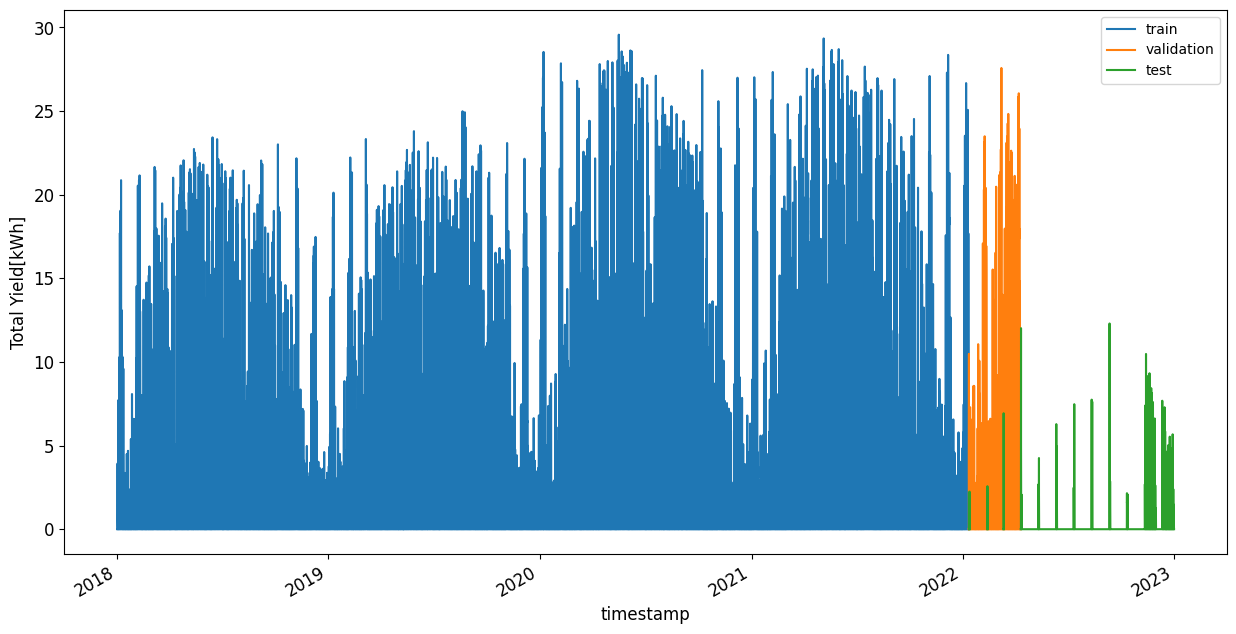

In [ ]:
# Rename columns and split the data
split_data = ts_data_load[ts_data_load.index < valid_st_data_load][['Total Yield[kWh]']].rename(columns={'Total Yield[kWh]': 'train'}) \
    .join(ts_data_load[(ts_data_load.index >= valid_st_data_load) & (ts_data_load.index <= test_st_data_load)][['Total Yield[kWh]']] \
          .rename(columns={'Total Yield[kWh]': 'validation'}),
          how='outer') \
    .join(ts_data_load[test_st_data_load:][['Total Yield[kWh]']]
          .rename(columns={'Total Yield[kWh]': 'test'}),
          how='outer')

# Plot the data
split_data.plot(y=['train', 'validation', 'test'], figsize=(15, 8), fontsize=12)
plt.xlabel('timestamp', fontsize=12)
plt.ylabel('Total Yield[kWh]', fontsize=12)
plt.show()

In [ ]:
pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.3 MB/s eta 0:00:00


# GRU MODEL

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import RMSprop, Adam, SGD
from keras_tuner.tuners import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the data
ts_data_load = pd.read_csv('Durning centre data hourly captured - with enviromental features.csv',
                           parse_dates={'dt': ['Date', 'Time']},
                           infer_datetime_format=True,
                           low_memory=False,
                           na_values=['nan', '?'],
                           index_col='dt')

# Remove duplicate timestamps
ts_data_load = ts_data_load[~ts_data_load.index.duplicated()]

# Define parameters
T = 6  # Number of lag variables
HORIZON = 1  # Prediction horizon
valid_st_data_load = '2022-01-11 01:00:00'
test_st_data_load = '2022-04-11 01:00:00'  # Test start date

# Convert index to Timestamp objects with inferred format
ts_data_load.index = pd.to_datetime(ts_data_load.index, format='mixed')

# Count the number of data points in the valid and test ranges
valid_data_points = ts_data_load[(ts_data_load.index >= valid_st_data_load) & (ts_data_load.index < test_st_data_load)].shape[0]
test_data_points = ts_data_load[ts_data_load.index >= test_st_data_load].shape[0]

print("Number of data points in the validation range:", valid_data_points)
print("Number of data points in the test range:", test_data_points)

# Get the train data from the correct data range
train = ts_data_load.copy()[ts_data_load.index < valid_st_data_load][['Total Yield[kWh]']]

# Scale data to be in range (0, 1) using MinMaxscaler
scaler = MinMaxScaler()
train['Total Yield[kWh]'] = scaler.fit_transform(train)

# Step 3: Shift the dataframe to create the input samples using sliding window
train_shifted = train.copy()
train_shifted['y_t+1'] = train_shifted['Total Yield[kWh]'].shift(-1, freq='H')
for t in range(1, T+1):
    train_shifted[f'load_t-{T-t}'] = train_shifted['Total Yield[kWh]'].shift(T-t, freq='H')

y_col = 'y_t+1'
X_cols = [f'load_t-{T-t}' for t in range(T)]

train_shifted.columns = ['Total Yield[kWh]_original'] + [y_col] + X_cols

# Discard missing values
train_shifted = train_shifted.dropna(how='any')

# Transform pandas dataframe into a numpy array
y_train = train_shifted[y_col].to_numpy()
X_train = train_shifted[X_cols].to_numpy()

# Reshape X_train into a three-dimensional array
X_train = X_train.reshape(X_train.shape[0], T, 1)

# Validation Data Preparation (similar steps as train data)
valid = ts_data_load.copy()[(ts_data_load.index >= valid_st_data_load) & (ts_data_load.index < test_st_data_load)][['Total Yield[kWh]']]
valid['Total Yield[kWh]'] = scaler.transform(valid)  # Scale using the same scaler as train
valid_shifted = valid.copy()
valid_shifted['y_t+1'] = valid_shifted['Total Yield[kWh]'].shift(-1, freq='H')
for t in range(1, T+1):
    valid_shifted[f'load_t-{T-t}'] = valid_shifted['Total Yield[kWh]'].shift(T-t, freq='H')

valid_shifted.columns = ['Total Yield[kWh]_original'] + [y_col] + X_cols
valid_shifted = valid_shifted.dropna(how='any')

y_valid = valid_shifted[y_col].to_numpy()
X_valid = valid_shifted[X_cols].to_numpy()
X_valid = X_valid.reshape(X_valid.shape[0], T, 1)

# Test Data Preparation (similar steps as train data)
test = ts_data_load.copy()[test_st_data_load:][['Total Yield[kWh]']]
test['Total Yield[kWh]'] = scaler.transform(test)  # Scale using the same scaler as train
test_shifted = test.copy()
test_shifted['y_t+1'] = test_shifted['Total Yield[kWh]'].shift(-1, freq='H')
for t in range(1, T+1):
    test_shifted[f'load_t-{T-t}'] = test_shifted['Total Yield[kWh]'].shift(T-t, freq='H')

test_shifted.columns = ['Total Yield[kWh]_original'] + [y_col] + X_cols
test_shifted = test_shifted.dropna(how='any')

y_test = test_shifted[y_col].to_numpy()
X_test = test_shifted[X_cols].to_numpy()
X_test = X_test.reshape(X_test.shape[0], T, 1)

# Check shapes
print("Shapes:")
print("Train Data:", X_train.shape, y_train.shape)
print("Validation Data:", X_valid.shape, y_valid.shape)
print("Test Data:", X_test.shape, y_test.shape)

# Define parameters for the model
LATENT_DIM = 5
BATCH_SIZE = 32
EPOCHS = 10  # Define the number of epochs here

# Function to build the model
def build_model(hp):
    model = Sequential()
    for i in range(hp.Int('num_gru_layers', 1, 3)):  # Search for number of GRU layers
        model.add(GRU(units=hp.Int('units_' + str(i), min_value=32, max_value=128, step=32),
                      return_sequences=True if i < hp.get('num_gru_layers') - 1 else False,
                      input_shape=(T, 1)))
        model.add(Dropout(rate=hp.Float('dropout_' + str(i), min_value=0.0, max_value=0.5, step=0.1)))  # Search for dropout rates
    model.add(Dense(HORIZON))

    # Select optimizer
    optimizer_choice = hp.Choice('optimizer', ['adam', 'rmsprop', 'sgd'])
    if optimizer_choice == 'adam':
        optimizer = Adam(learning_rate=hp.Choice('adam_learning_rate', values=[1e-2, 1e-3, 1e-4]))
    elif optimizer_choice == 'rmsprop':
        optimizer = RMSprop(learning_rate=hp.Choice('rmsprop_learning_rate', values=[1e-2, 1e-3, 1e-4]))
    else:
        optimizer = SGD(learning_rate=hp.Choice('sgd_learning_rate', values=[1e-2, 1e-3, 1e-4]))

    model.compile(optimizer=optimizer, loss='mse')
    return model

# Define early stopping criteria
GRU_earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

# Instantiate the tuner
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5,  # Adjust as needed
    executions_per_trial=1,
    directory='my_dir',
    project_name='gru_hyperparameter_tuning'
)

# Perform hyperparameter search
tuner.search(X_train, y_train,
             epochs=EPOCHS,
             batch_size=BATCH_SIZE,
             validation_data=(X_valid, y_valid),
             callbacks=[GRU_earlystop])

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=2)[0]

# Build the model with the best hyperparameters and fit it
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(X_train, y_train,
                         epochs=EPOCHS,
                         batch_size=BATCH_SIZE,
                         validation_data=(X_valid, y_valid),
                         callbacks=[GRU_earlystop])

# Evaluate the model on test data
y_pred_gru = best_model.predict(X_test)
mae_gru = mean_absolute_error(y_test, y_pred_gru)
mse_gru = mean_squared_error(y_test, y_pred_gru)
r2_gru = r2_score(y_test, y_pred_gru)

print("\nGRU Model Metrics:")
print("R-squared (R²):", round(r2_gru, 2))

# Print the summary of the best model
best_model.summary()

Trial 5 Complete [00h 01m 17s]
val_loss: 0.004472420550882816

Best val_loss So Far: 0.004293825943022966
Total elapsed time: 00h 16m 31s
Epoch 1/10
1104/1104 ━━━━━━━━━━━━━━━━━━━━ 24s 17ms/step - loss: 0.0188 - val_loss: 0.0066
Epoch 2/10
1104/1104 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - loss: 0.0059 - val_loss: 0.0048
Epoch 3/10
1104/1104 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - loss: 0.0048 - val_loss: 0.0048
Epoch 4/10
1104/1104 ━━━━━━━━━━━━━━━━━━━━ 19s 17ms/step - loss: 0.0047 - val_loss: 0.0045
Epoch 5/10
1104/1104 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - loss: 0.0048 - val_loss: 0.0046
Epoch 6/10
1104/1104 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - loss: 0.0046 - val_loss: 0.0046
Epoch 7/10
1104/1104 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - loss: 0.0045 - val_loss: 0.0044
Epoch 8/10
1104/1104 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - loss: 0.0046 - val_loss: 0.0044
Epoch 9/10
1104/1104 ━━━━━━━━━━━━━━━━━━━━ 40s 18ms/step - loss: 0.0044 - val_loss: 0.0044
Epoch 10/10
1104/1104 ━━━━━━━━━━━━━━━━━━━━ 19s 17ms/

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_1 (GRU)                          │ (None, 6, 128)              │          50,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 6, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_2 (GRU)                          │ (None, 6, 32)               │          15,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_3 (GRU)                          │ (None, 32)                  │           6,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 216,677 (846.40 KB)

 Trainable params: 72,225 (282.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 144,452 (564.27 KB)

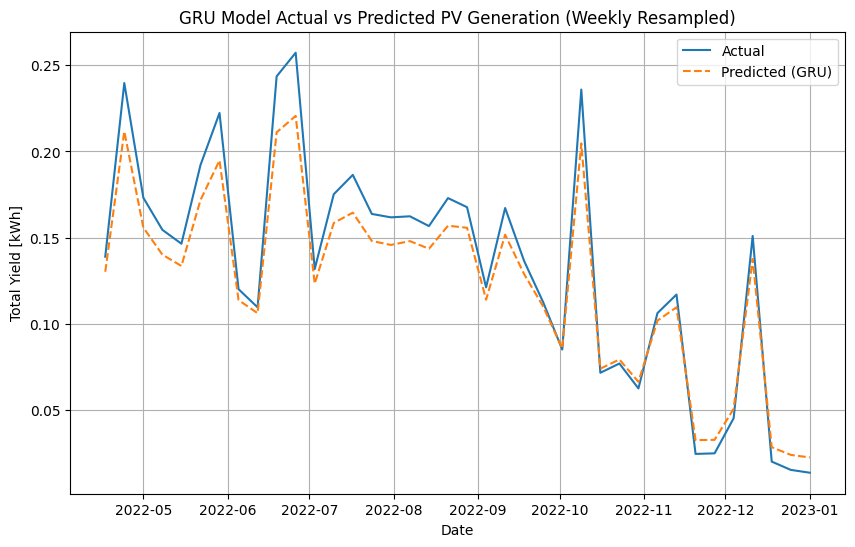

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# Assuming y_test, y_pred_gru, and test_shifted.index are available from previous steps

# Create a DataFrame for actual and predicted values
test_resampled = pd.DataFrame({
    'Actual': y_test.flatten(),
    'Predicted': y_pred_gru.flatten()
}, index=test_shifted.index[:len(y_test)])

# Resample to weekly means
test_resampled_weekly = test_resampled.resample('W').mean()

# Plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(test_resampled_weekly.index, test_resampled_weekly['Actual'], label='Actual')
plt.plot(test_resampled_weekly.index, test_resampled_weekly['Predicted'], label='Predicted (GRU)', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Total Yield [kWh]')
plt.title('GRU Model Actual vs Predicted PV Generation (Weekly Resampled)')
plt.legend()
plt.grid(True)
plt.show()

# Plot using Plotly
fig = px.line(test_resampled_weekly, labels={"value": "Total Yield [kWh]", "index": "Date"})
fig.add_scatter(x=test_resampled_weekly.index, y=test_resampled_weekly['Actual'], mode='lines', name='Actual')
fig.add_scatter(x=test_resampled_weekly.index, y=test_resampled_weekly['Predicted'], mode='lines', name='Predicted (GRU)', line=dict(dash='dash'))
fig.update_layout(
    title="GRU Model Actual vs Predicted PV Generation (Weekly Resampled)",
    xaxis_title="Date",
    yaxis_title="Total Yield [kWh]",
    legend_title="Legend"
)
fig.show()


In [ ]:
import pandas as pd

# Create a DataFrame with actual, predicted values and corresponding timestamps
comparison_df_gru = pd.DataFrame({
    'Timestamp': test_shifted.index[:10],    # First 10 timestamps
    'Actual': y_test[:10].flatten(),         # First 10 actual values
    'Predicted': y_pred_gru[:10].flatten()   # First 10 predicted values
})

# Print the comparison DataFrame
print(comparison_df_gru)


            Timestamp    Actual  Predicted
0 2022-05-01 01:00:00  0.000000  -0.015050
1 2022-05-01 02:00:00  0.000000  -0.014251
2 2022-05-01 03:00:00  0.000000  -0.014245
3 2022-05-01 04:00:00  0.000000  -0.014245
4 2022-05-01 05:00:00  0.000000  -0.014245
5 2022-05-01 06:00:00  0.000000  -0.014245
6 2022-05-01 07:00:00  0.000000  -0.014245
7 2022-05-01 08:00:00  0.000000  -0.014245
8 2022-05-01 09:00:00  0.026075  -0.014245
9 2022-05-01 10:00:00  0.067100   0.024795


In [ ]:
best_model.save('best_gru_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# LSTM MODEL

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import RMSprop, Adam, SGD
from keras_tuner.tuners import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Define parameters
LATENT_DIM = 5
BATCH_SIZE = 32
EPOCHS = 10  # Define the number of epochs here

# Function to build the model
def build_model(hp):
    model = Sequential()
    for i in range(hp.Int('num_lstm_layers', 1, 3)):  # Search for number of LSTM layers
        model.add(LSTM(units=hp.Int('units_' + str(i), min_value=32, max_value=128, step=32),
                      return_sequences=True if i < hp.get('num_lstm_layers') - 1 else False,
                      input_shape=(T, 1)))
        model.add(Dropout(rate=hp.Float('dropout_' + str(i), min_value=0.0, max_value=0.5, step=0.1)))  # Search for dropout rates
    model.add(Dense(HORIZON))

    # Select optimizer
    optimizer_choice = hp.Choice('optimizer', ['adam', 'rmsprop', 'sgd'])
    if optimizer_choice == 'adam':
        optimizer = Adam(learning_rate=hp.Choice('adam_learning_rate', values=[1e-2, 1e-3, 1e-4]))
    elif optimizer_choice == 'rmsprop':
        optimizer = RMSprop(learning_rate=hp.Choice('rmsprop_learning_rate', values=[1e-2, 1e-3, 1e-4]))
    else:
        optimizer = SGD(learning_rate=hp.Choice('sgd_learning_rate', values=[1e-2, 1e-3, 1e-4]))

    model.compile(optimizer=optimizer,
                  loss='mse')
    return model

# Define early stopping criteria
LSTM_earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

# Instantiate the tuner
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5,  # Adjust as needed
    executions_per_trial=1,
    directory='my_dir',
    project_name='lstm_hyperparameter_tuning'
)

# Perform hyperparameter search
tuner.search(X_train, y_train,
             epochs=EPOCHS,
             batch_size=BATCH_SIZE,
             validation_data=(X_valid, y_valid),
             callbacks=[LSTM_earlystop])

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=2)[0]

# Build the model with the best hyperparameters and fit it
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(X_train, y_train,
                         epochs=EPOCHS,
                         batch_size=BATCH_SIZE,
                         validation_data=(X_valid, y_valid),
                         callbacks=[LSTM_earlystop])

# Evaluate the model on test data
y_pred_lstm = best_model.predict(X_test)
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
r2_lstm = r2_score(y_test, y_pred_lstm)

print("\nLSTM Model Metrics:")
print("R-squared (R²):", round(r2_lstm, 2))

# Print the summary of the best model
best_model.summary()

Reloading Tuner from my_dir/lstm_hyperparameter_tuning/tuner0.json


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/10
1104/1104 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - loss: 0.0143 - val_loss: 0.0047
Epoch 2/10
1104/1104 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - loss: 0.0057 - val_loss: 0.0045
Epoch 3/10
1104/1104 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - loss: 0.0054 - val_loss: 0.0045
Epoch 4/10
1104/1104 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - loss: 0.0053 - val_loss: 0.0042
Epoch 5/10
1104/1104 ━━━━━━━━━━━━━━━━━━━━ 18s 16ms/step - loss: 0.0050 - val_loss: 0.0043
Epoch 6/10
1104/1104 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - loss: 0.0049 - val_loss: 0.0043
Epoch 7/10
1104/1104 ━━━━━━━━━━━━━━━━━━━━ 19s 17ms/step - loss: 0.0049 - val_loss: 0.0042
Epoch 8/10
1104/1104 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - loss: 0.0047 - val_loss: 0.0043
Epoch 9/10
1104/1104 ━━━━━━━━━━━━━━━━━━━━ 18s 16ms/step - loss: 0.0049 - val_loss: 0.0041
Epoch 10/10
1104/1104 ━━━━━━━━━━━━━━━━━━━━ 18s 16ms/step - loss: 0.0047 - val_loss: 0.0041
199/199 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step

LSTM Model Metrics:
R-squared (R²): 0.89


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 6, 32)               │           4,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 6, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 128)                 │          82,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 260,741 (1018.52 KB)

 Trainable params: 86,913 (339.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 173,828 (679.02 KB)

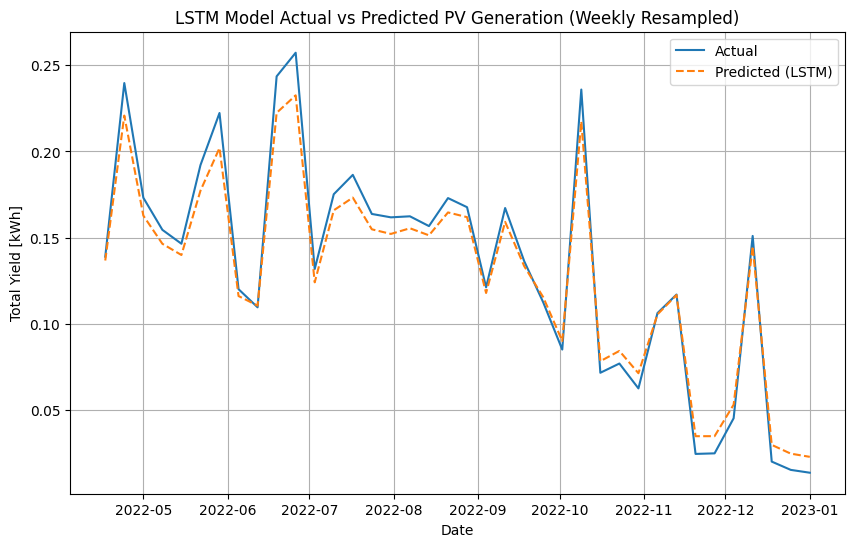

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# Assuming y_test, y_pred_lstm, and test_shifted.index are available from previous steps

# Create a DataFrame for actual and predicted values
test_resampled_lstm = pd.DataFrame({
    'Actual': y_test.flatten(),
    'Predicted': y_pred_lstm.flatten()
}, index=test_shifted.index[:len(y_test)])

# Resample to weekly means
test_resampled_weekly_lstm = test_resampled_lstm.resample('W').mean()

# Plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(test_resampled_weekly_lstm.index, test_resampled_weekly_lstm['Actual'], label='Actual')
plt.plot(test_resampled_weekly_lstm.index, test_resampled_weekly_lstm['Predicted'], label='Predicted (LSTM)', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Total Yield [kWh]')
plt.title('LSTM Model Actual vs Predicted PV Generation (Weekly Resampled)')
plt.legend()
plt.grid(True)
plt.show()

# Plot using Plotly
fig = px.line(test_resampled_weekly_lstm, labels={"value": "Total Yield [kWh]", "index": "Date"})
fig.add_scatter(x=test_resampled_weekly_lstm.index, y=test_resampled_weekly_lstm['Actual'], mode='lines', name='Actual')
fig.add_scatter(x=test_resampled_weekly_lstm.index, y=test_resampled_weekly_lstm['Predicted'], mode='lines', name='Predicted (LSTM)', line=dict(dash='dash'))
fig.update_layout(
    title="LSTM Model Actual vs Predicted PV Generation (Weekly Resampled)",
    xaxis_title="Date",
    yaxis_title="Total Yield [kWh]",
    legend_title="Legend"
)
fig.show()

In [ ]:
import pandas as pd

# Create a DataFrame with actual, predicted values and corresponding timestamps
comparison_df = pd.DataFrame({
    'Timestamp': test_shifted.index[:10],  # First 10 timestamps
    'Actual': y_test[:10].flatten(),       # First 10 actual values
    'Predicted': y_pred_lstm[:10].flatten() # First 10 predicted values
})

# Print the comparison DataFrame
print(comparison_df)



            Timestamp    Actual  Predicted
0 2022-05-01 01:00:00  0.000000   0.000334
1 2022-05-01 02:00:00  0.000000   0.000581
2 2022-05-01 03:00:00  0.000000   0.000582
3 2022-05-01 04:00:00  0.000000   0.000582
4 2022-05-01 05:00:00  0.000000   0.000582
5 2022-05-01 06:00:00  0.000000   0.000582
6 2022-05-01 07:00:00  0.000000   0.000582
7 2022-05-01 08:00:00  0.000000   0.000582
8 2022-05-01 09:00:00  0.026075   0.000582
9 2022-05-01 10:00:00  0.067100   0.073362


In [ ]:
best_model.save('best_lstm_model.h5')
